In [14]:
import numpy as np
from pylab import *
from scipy import ndimage
from scipy import misc
import imageio
import os
import glob

import h5py as h5
import re

import matplotlib.animation as anim

import time
from progress import ProgressBar, query_yes_no

%matplotlib inline
rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

# Load an image 

In [2]:
filedir = '/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half'
files = glob.glob(os.path.join(filedir,'Danio_16_PMA_scan3_rec_Tra_scaled[0-9][0-9][0-9][0-9].jpg'))
files = sorted(files)

In [4]:
frames = [286, 880]

In [6]:
prog = re.compile('(\d{4})\.jpg')
filenum = []
for fn in files:
    res = prog.search(fn)
    filenum.append(int(res.group(1)))

In [7]:
files = [fn for fn,num in zip(files,filenum) if num >= frames[0] and num <= frames[1]]

In [8]:
len(files)

595

In [9]:
print(files[0])
print(files[-1])

/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0286.jpg
/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0880.jpg


(1108, 1108, 3)


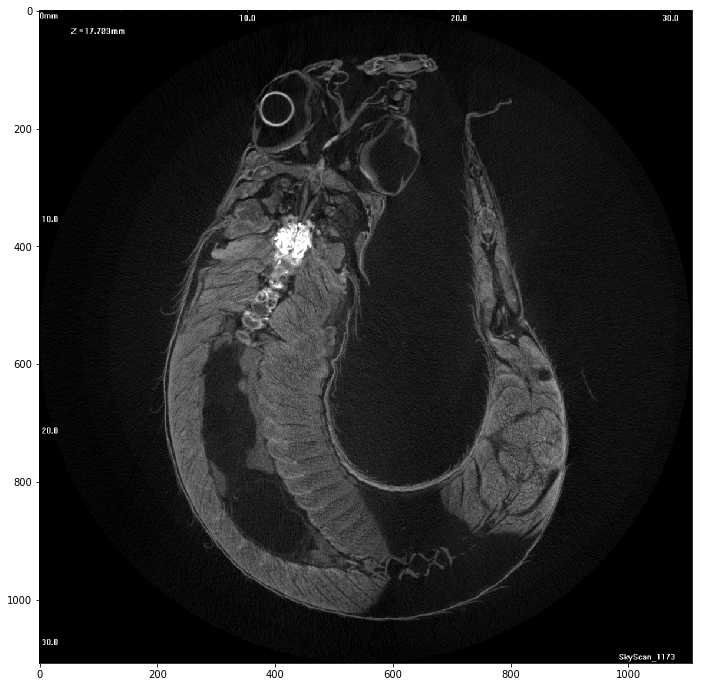

In [15]:
%matplotlib inline
rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

I = imageio.imread(files[350])
imshow(I, cmap=cm.gray)
print(I.shape)
show()

Crop the image

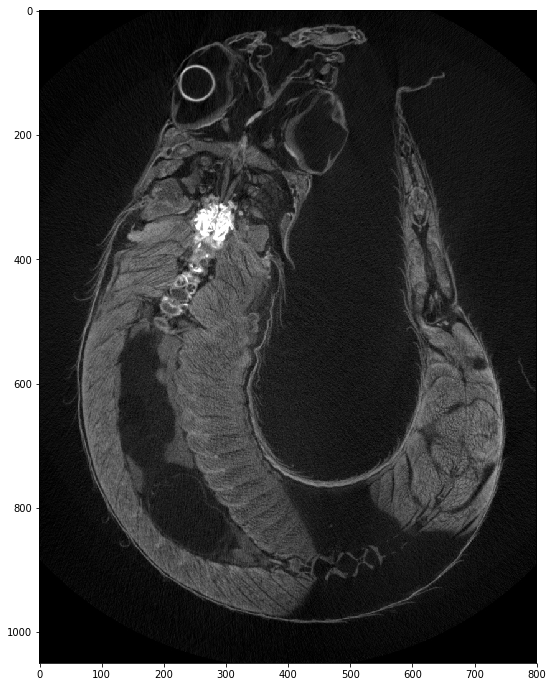

In [30]:
crop = (slice(50,1100),slice(150,950), 0)
imshow(I[crop], cmap=cm.gray)
show()

## Check crop on other images

/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0321.jpg
/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0356.jpg
/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0391.jpg
/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0426.jpg
/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0461.jpg
/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0496.jpg


/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0531.jpg
/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0566.jpg
/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0600.jpg
/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0635.jpg
/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0670.jpg
/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0705.jpg


/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0740.jpg
/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0775.jpg
/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0810.jpg
/Users/etytel01/Documents/Fibers/rawdata/Danio_16_Half/Danio_16_PMA_scan3_rec_Tra_scaled0845.jpg


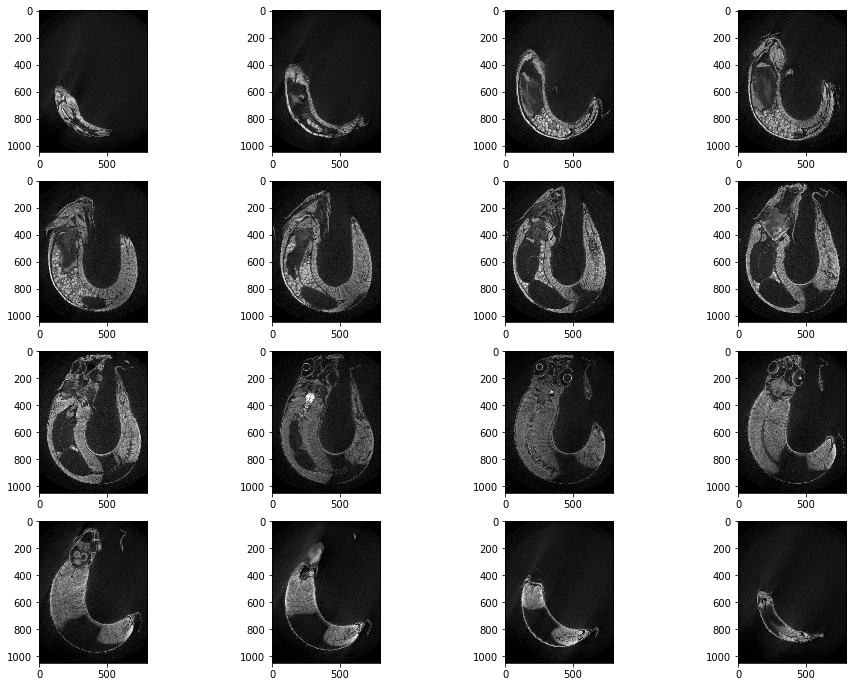

In [31]:
fig,ax = subplots(4,4)
r = np.linspace(0,len(files)-1,18)
r = r[1:-1]
for ax,f in zip(ax.flat, r):
    print(files[int(round(f))])
    I1 = imageio.imread(files[int(round(f))])
    ax.imshow(I1[crop], cmap=cm.gray)
show()

# Set up the file

In [21]:
outfile = 'Danio_16.h5'

## Make the image dataset

Warning!  This can take a long time

In [34]:
f = h5.File(outfile,'w-')

imsz = list(I[crop].shape) + [len(files)]
chunksz = (32,32,32)
imgdata = f.create_dataset('image',imsz, chunks=chunksz, dtype=I.dtype)
with ProgressBar(total=len(files)) as prog:
    for (i,filename) in enumerate(files):
        I1 = misc.imread(files[i])
        imgdata[:,:,i] = I1[crop]
        prog.update(1)
f.close()

/Users/etytel01/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


 [>                                                            ] 0%  0sec elapsed, 1m 54sec remaining None


 [>                                                            ] 1%  1sec elapsed, 1m 37sec remaining None


 [->                                                           ] 2%  2sec elapsed, 1m 35sec remaining None


 [-->                                                          ] 3%  4sec elapsed, 1m 33sec remaining None


 [-->                                                          ] 4%  5sec elapsed, 1m 31sec remaining None


 [--->                                                         ] 5%  6sec elapsed, 1m 31sec remaining None


 [---->                                                        ] 7%  7sec elapsed, 1m 29sec remaining None


 [---->                                                        ] 8%  8sec elapsed, 1m 27sec remaining None


 [----->                                                       ] 9%  9sec elapsed, 1m 26sec remaining None


 [------>                                                      ] 10%  10sec elapsed, 1m 25sec remaining None


 [------->                                                     ] 11%  11sec elapsed, 1m 24sec remaining None


 [------->                                                     ] 12%  12sec elapsed, 1m 23sec remaining None


 [-------->                                                    ] 14%  14sec elapsed, 1m 22sec remaining None


 [--------->                                                   ] 15%  15sec elapsed, 1m 21sec remaining None


 [--------->                                                   ] 16%  16sec elapsed, 1m 20sec remaining None


 [---------->                                                  ] 17%  17sec elapsed, 1m 19sec remaining None


 [----------->                                                 ] 18%  18sec elapsed, 1m 17sec remaining None


 [------------>                                                ] 20%  19sec elapsed, 1m 16sec remaining None


 [------------>                                                ] 21%  20sec elapsed, 1m 15sec remaining None


 [------------->                                               ] 22%  21sec elapsed, 1m 14sec remaining None


 [------------->                                               ] 23%  22sec elapsed, 1m 13sec remaining None


 [-------------->                                              ] 24%  23sec elapsed, 1m 12sec remaining None


 [--------------->                                             ] 25%  24sec elapsed, 1m 11sec remaining None


 [---------------->                                            ] 26%  26sec elapsed, 1m 10sec remaining None


 [---------------->                                            ] 27%  27sec elapsed, 1m 9sec remaining None


 [----------------->                                           ] 28%  28sec elapsed, 1m 8sec remaining None


 [----------------->                                           ] 29%  29sec elapsed, 1m 7sec remaining None


 [------------------>                                          ] 31%  30sec elapsed, 1m 6sec remaining None


 [------------------->                                         ] 32%  31sec elapsed, 1m 5sec remaining None


 [-------------------->                                        ] 33%  32sec elapsed, 1m 4sec remaining None


 [-------------------->                                        ] 34%  33sec elapsed, 1m 2sec remaining None


 [--------------------->                                       ] 35%  34sec elapsed, 1m 1sec remaining None


 [---------------------->                                      ] 36%  36sec elapsed, 1m 0sec remaining None


 [---------------------->                                      ] 38%  37sec elapsed, 59sec remaining None


 [----------------------->                                     ] 39%  38sec elapsed, 58sec remaining None


 [------------------------>                                    ] 40%  39sec elapsed, 57sec remaining None


 [------------------------>                                    ] 41%  40sec elapsed, 56sec remaining None


 [------------------------->                                   ] 42%  41sec elapsed, 55sec remaining None


 [-------------------------->                                  ] 43%  42sec elapsed, 54sec remaining None


 [--------------------------->                                 ] 45%  43sec elapsed, 53sec remaining None


 [--------------------------->                                 ] 46%  44sec elapsed, 52sec remaining None


 [---------------------------->                                ] 47%  45sec elapsed, 50sec remaining None


 [----------------------------->                               ] 48%  47sec elapsed, 49sec remaining None


 [----------------------------->                               ] 49%  48sec elapsed, 48sec remaining None


 [------------------------------>                              ] 50%  49sec elapsed, 47sec remaining None


 [------------------------------->                             ] 52%  50sec elapsed, 46sec remaining None


 [------------------------------->                             ] 53%  51sec elapsed, 45sec remaining None


 [-------------------------------->                            ] 54%  52sec elapsed, 44sec remaining None


 [--------------------------------->                           ] 55%  53sec elapsed, 43sec remaining None


 [--------------------------------->                           ] 56%  54sec elapsed, 42sec remaining None


 [---------------------------------->                          ] 57%  55sec elapsed, 40sec remaining None


 [---------------------------------->                          ] 58%  56sec elapsed, 40sec remaining None


 [----------------------------------->                         ] 59%  58sec elapsed, 39sec remaining None


 [------------------------------------>                        ] 60%  59sec elapsed, 38sec remaining None


 [------------------------------------->                       ] 61%  60sec elapsed, 37sec remaining None


 [------------------------------------->                       ] 63%  1m 0sec elapsed, 36sec remaining None


 [-------------------------------------->                      ] 64%  1m 2sec elapsed, 35sec remaining None


 [--------------------------------------->                     ] 65%  1m 3sec elapsed, 33sec remaining None


 [--------------------------------------->                     ] 66%  1m 4sec elapsed, 32sec remaining None


 [---------------------------------------->                    ] 67%  1m 5sec elapsed, 31sec remaining None


 [----------------------------------------->                   ] 68%  1m 6sec elapsed, 30sec remaining None


 [------------------------------------------>                  ] 70%  1m 7sec elapsed, 29sec remaining None


 [------------------------------------------>                  ] 71%  1m 8sec elapsed, 28sec remaining None


 [------------------------------------------->                 ] 72%  1m 9sec elapsed, 27sec remaining None


 [-------------------------------------------->                ] 73%  1m 11sec elapsed, 25sec remaining None


 [-------------------------------------------->                ] 74%  1m 12sec elapsed, 24sec remaining None


 [--------------------------------------------->               ] 75%  1m 13sec elapsed, 23sec remaining None


 [---------------------------------------------->              ] 77%  1m 14sec elapsed, 22sec remaining None


 [---------------------------------------------->              ] 78%  1m 15sec elapsed, 21sec remaining None


 [----------------------------------------------->             ] 79%  1m 16sec elapsed, 20sec remaining None


 [------------------------------------------------>            ] 80%  1m 17sec elapsed, 19sec remaining None


 [------------------------------------------------->           ] 81%  1m 18sec elapsed, 18sec remaining None


 [------------------------------------------------->           ] 82%  1m 19sec elapsed, 17sec remaining None


 [-------------------------------------------------->          ] 83%  1m 21sec elapsed, 16sec remaining None


 [--------------------------------------------------->         ] 85%  1m 22sec elapsed, 14sec remaining None


 [--------------------------------------------------->         ] 86%  1m 23sec elapsed, 13sec remaining None


 [---------------------------------------------------->        ] 87%  1m 24sec elapsed, 12sec remaining None


 [----------------------------------------------------->       ] 88%  1m 25sec elapsed, 11sec remaining None


 [----------------------------------------------------->       ] 89%  1m 26sec elapsed, 10sec remaining None


 [------------------------------------------------------>      ] 90%  1m 27sec elapsed, 9sec remaining None


 [------------------------------------------------------>      ] 91%  1m 28sec elapsed, 8sec remaining None


 [------------------------------------------------------->     ] 92%  1m 29sec elapsed, 7sec remaining None


 [-------------------------------------------------------->    ] 93%  1m 30sec elapsed, 6sec remaining None


 [--------------------------------------------------------->   ] 95%  1m 32sec elapsed, 5sec remaining None


 [--------------------------------------------------------->   ] 96%  1m 33sec elapsed, 4sec remaining None


 [---------------------------------------------------------->  ] 97%  1m 34sec elapsed, 2sec remaining None


 [-----------------------------------------------------------> ] 98%  1m 35sec elapsed, 1sec remaining None


 [-----------------------------------------------------------> ] 99%  1m 36sec elapsed, 0sec remaining None


 [------------------------------------------------------------>] 100%  1m 36sec elapsed, 0sec remaining None


 [------------------------------------------------------------>] 100%  1m 36sec elapsed, 0sec remaining None


# Make some animations

In [15]:
%matplotlib qt

In [16]:
imgfile = h5.File(outfile,'r')
imgdata = imgfile['image']
print(imgdata.shape)

(1000, 1000, 552)


In [17]:
frames = np.linspace(0,imgdata.shape[0],18)
frames = frames[1:-1]
for fr in frames:
    print("{}: [{},{}]".format(fr, np.min(imgdata[fr,:,:]), np.max(imgdata[fr,:,:])))

58.8235294118: [0,53420]
117.647058824: [0,61526]
176.470588235: [0,65535]
235.294117647: [0,65535]
294.117647059: [0,65535]
352.941176471: [0,60493]
411.764705882: [0,60640]
470.588235294: [0,65535]
529.411764706: [0,60236]
588.235294118: [0,62380]
647.058823529: [0,65535]
705.882352941: [0,65535]
764.705882353: [0,65535]
823.529411765: [0,65535]
882.352941176: [0,65535]
941.176470588: [0,65535]


In [18]:
dpi = 96

In [19]:
def show_yz_slice(num, data, im):
    im.set_data(data[num,:,:].T)
    return im,

In [20]:
%matplotlib qt

fig = figure(frameon=False)
fig.set_size_inches(imgdata.shape[1]/dpi, imgdata.shape[2]/dpi)

ax = axes([0., 0., 1., 1.])
im = ax.imshow(imgdata[0,:,:].T, cmap=cm.gray, vmin=0, vmax=65000)

im_ani = anim.FuncAnimation(fig, show_yz_slice, frames=imgdata.shape[0], fargs=(imgdata, im), interval=50)
show()

In [21]:
writer = anim.writers['ffmpeg'](fps=10, metadata=dict(artist='Eric Tytell'), bitrate=1800)

In [22]:
moviefile = 'Drerio_7yz.mp4'

if not os.path.exists(moviefile):
    im_ani.save(moviefile, writer=writer)
else:
    print("File already exists!")